# This notebook is for general analysis of longer immersion time data  
Analytes are Carbendazim , Acetamiprid and Acephate  
Data will be analyzed across multiple days and power settings
Analysis techniques that are used are as follows:  
- Power dependence
- Time dependence
- Noise analysis  
- NMF  
- PCA  

### Import all the neccessary modules

In [73]:
import sys
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
import pandas as pd
from tools.ramanflow.read_data import ReadData as RD
from tools.ramanflow.prep_data import PrepData as PD
from scipy.signal import savgol_filter
import numpy as np
import math
from sklearn.decomposition import PCA, NMF
import plotly.graph_objects as go
import os
from matplotlib import ticker

### Import all the data

#### Colloidal sollution data

In [2]:
colloidal_power_mean = np.zeros((5, 1600))
_, colloidal_power = RD.read_dir_tiff_files("data/20210810 SERS timed immersion experiment/colloidal solution")

ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'


#### 8/10 measurements

In [3]:
f_sup_0810, car_0810 = RD.read_dir_tiff_files('data/20210810 SERS timed immersion experiment/1')
f_sup_0810, aceta_0810 = RD.read_dir_tiff_files('data/20210810 SERS timed immersion experiment/4')
f_sup_0810, aceph_0810 = RD.read_dir_tiff_files('data/20210810 SERS timed immersion experiment/5')
f_sup_0810, car_aceta_0810 = RD.read_dir_tiff_files('data/20210810 SERS timed immersion experiment/1+4')
f_sup_0810, car_aceph_0810 = RD.read_dir_tiff_files('data/20210810 SERS timed immersion experiment/1+5')
f_sup_0810, aceta_aceph_0810 = RD.read_dir_tiff_files('data/20210810 SERS timed immersion experiment/4+5')
f_sup_0810, car_aceta_aceph_0810 = RD.read_dir_tiff_files('data/20210810 SERS timed immersion experiment/1+4+5')

ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra di

#### 8/11 measurements

In [4]:
f_sup_0811, car_0811 = RD.read_dir_tiff_files('data/20210811 SERS timed immersion experiment/1')
f_sup_0811, aceta_0811 = RD.read_dir_tiff_files('data/20210811 SERS timed immersion experiment/4')
f_sup_0811, aceph_0811 = RD.read_dir_tiff_files('data/20210811 SERS timed immersion experiment/5')
f_sup_0811, car_aceta_0811 = RD.read_dir_tiff_files('data/20210811 SERS timed immersion experiment/1+4')
f_sup_0811, car_aceph_0811 = RD.read_dir_tiff_files('data/20210811 SERS timed immersion experiment/1+5')
f_sup_0811, aceta_aceph_0811 = RD.read_dir_tiff_files('data/20210811 SERS timed immersion experiment/4+5')
f_sup_0811, car_aceta_aceph_0811 = RD.read_dir_tiff_files('data/20210811 SERS timed immersion experiment/1+4+5')

ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra di

#### 8/13 measurements

In [5]:
f_sup_0813, car_0813 = RD.read_dir_tiff_files('data/20210813 SERS timed immersion experiment/1')
f_sup_0813, aceta_0813 = RD.read_dir_tiff_files('data/20210813 SERS timed immersion experiment/4')
f_sup_0813, aceph_0813 = RD.read_dir_tiff_files('data/20210813 SERS timed immersion experiment/5')
f_sup_0813, car_aceta_0813 = RD.read_dir_tiff_files('data/20210813 SERS timed immersion experiment/1+4')
f_sup_0813, car_aceph_0813 = RD.read_dir_tiff_files('data/20210813 SERS timed immersion experiment/1+5')
f_sup_0813, aceta_aceph_0813 = RD.read_dir_tiff_files('data/20210813 SERS timed immersion experiment/4+5')
f_sup_0813, car_aceta_aceph_0813 = RD.read_dir_tiff_files('data/20210813 SERS timed immersion experiment/1+4+5')

ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra di

#### 8/18 measurements

In [6]:
f_sup_0818, car_0818 = RD.read_dir_tiff_files('data/20210818 SERS timed immersion experiment/1')
f_sup_0818, aceta_0818 = RD.read_dir_tiff_files('data/20210818 SERS timed immersion experiment/4')
f_sup_0818, aceph_0818 = RD.read_dir_tiff_files('data/20210818 SERS timed immersion experiment/5')
f_sup_0818, car_aceta_0818 = RD.read_dir_tiff_files('data/20210818 SERS timed immersion experiment/1+4')
f_sup_0818, car_aceph_0818 = RD.read_dir_tiff_files('data/20210818 SERS timed immersion experiment/1+5')
f_sup_0818, aceta_aceph_0818 = RD.read_dir_tiff_files('data/20210818 SERS timed immersion experiment/4+5')
f_sup_0818, car_aceta_aceph_0818 = RD.read_dir_tiff_files('data/20210818 SERS timed immersion experiment/1+4+5')

ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra di

#### Merging all of the data for convinience

In [7]:
carbendanzim_data = {**car_0810, **car_0811, **car_0813, **car_0818}
acetamiprid_data = {**aceta_0810, **aceta_0811, **aceta_0813, **aceta_0818}
acephate_data = {**aceph_0810, **aceph_0811, **aceph_0813, **aceph_0818}
car_aceta_data = {**car_aceta_0810, **car_aceta_0811, **car_aceta_0813, **car_aceta_0818}
car_aceph_data = {**car_aceph_0810, **car_aceph_0811, **car_aceph_0813, **car_aceph_0818}
aceta_aceph_data = {**aceta_aceph_0810, **aceta_aceph_0811, **aceta_aceph_0813, **aceta_aceph_0818}
car_aceta_aceph_data = {**car_aceta_aceph_0810, **car_aceta_aceph_0811, **car_aceta_aceph_0813, **car_aceta_aceph_0818}

### Orderly set up  
Since the files in the directories are processed as keys in a dictionary, we loose the order of time and power.  
That is why we create this list of strings to process the whole data in an orderly fashion.  

#### Define measument time points

In [8]:
time_points = [5, 30, 60, 180, 300, 1440, 4320, 11520]
time_labels = ['5 min', '30 min', '1 hour', '3 hours', '5 hours', '24 hours', '3 days (4320 mins)', '8 days (11520 mins)']

#### Carbendazim data

In [36]:
car_power_1_time_evol = ['1_5min_1', '1_30min_1', '1_1hour_1', '1_3hours_1', '1_5hours_1', '1_24hours_1', '1_1458hours_1_1', '1_1530_1']
car_power_2_time_evol = ['1_5min_2', '1_30min_2', '1_1hour_2', '1_3hours_2', '1_5hours_2', '1_24hours_2', '1_1458hours_1_2', '1_1530_2']
car_power_3_time_evol = ['1_5min_3', '1_30min_3', '1_1hour_3', '1_3hours_3', '1_5hours_3', '1_24hours_3', '1_1458hours_1_3', '1_1530_3']
car_power_4_time_evol = ['1_5min_4', '1_30min_4', '1_1hour_4', '1_3hours_4', '1_5hours_4', '1_24hours_4', '1_1458hours_1_4', '1_1530_4']
car_power_5_time_evol = ['1_5min_5', '1_30min_5', '1_1hour_5', '1_3hours_5', '1_5hours_5', '1_24hours_5', '1_1458hours_1_5', '1_1530_5']

In [37]:
car_power_time_evol_mean = np.zeros((5, 8, 1600))

In [38]:
j = 0
for idx_1, idx_2, idx_3, idx_4, idx_5 in zip(car_power_1_time_evol, car_power_2_time_evol, car_power_3_time_evol, car_power_4_time_evol, car_power_5_time_evol):
    car_power_time_evol_mean[0, j] = np.mean(carbendanzim_data[idx_1], axis=0)
    car_power_time_evol_mean[1, j] = np.mean(carbendanzim_data[idx_2], axis=0)
    car_power_time_evol_mean[2, j] = np.mean(carbendanzim_data[idx_3], axis=0)
    car_power_time_evol_mean[3, j] = np.mean(carbendanzim_data[idx_4], axis=0)
    car_power_time_evol_mean[4, j] = np.mean(carbendanzim_data[idx_5], axis=0)
    j += 1

#### Export as CSV

In [40]:
for i in range(len(car_power_time_evol_mean)):
    df = pd.DataFrame(data=car_power_time_evol_mean[i].T, columns=time_labels)
    df.to_csv("car_power_"+str(i)+"_mean_data.csv", index=False)

In [19]:
j = 0
for item in car_power_time_evol_mean:
    np.savetxt('car_mean_data.csv', item, delimiter=',')

#### Acetamiprid data

In [9]:
aceta_power_1_time_evol = ['4_5min_1', '4_30min_1', '4_1hour_1', '4_3hours_1', '4_5hours_1', '4_24hours_1', '1_1513hours_1_1_1', '4_1540_1']
aceta_power_2_time_evol = ['4_5min_2', '4_30min_2', '4_1hour_2', '4_3hours_2', '4_5hours_2', '4_24hours_2', '1_1513hours_1_1_2', '4_1540_2']
aceta_power_3_time_evol = ['4_5min_3', '4_30min_3', '4_1hour_3', '4_3hours_3', '4_5hours_3', '4_24hours_3', '1_1513hours_1_1_3', '4_1540_3']
aceta_power_4_time_evol = ['4_5min_4', '4_30min_4', '4_1hour_4', '4_3hours_4', '4_5hours_4', '4_24hours_4', '1_1513hours_1_1_4', '4_1540_4']
aceta_power_5_time_evol = ['4_5min_5', '4_30min_5', '4_1hour_5', '4_3hours_5', '4_5hours_5', '4_24hours_5', '1_1513hours_1_1_5', '4_1540_5']

In [10]:
aceta_power_time_evol_mean = np.zeros((5, 8, 1600))

In [11]:
j = 0
for idx_1, idx_2, idx_3, idx_4, idx_5 in zip(aceta_power_1_time_evol, aceta_power_2_time_evol, aceta_power_3_time_evol, aceta_power_4_time_evol, aceta_power_5_time_evol):
    aceta_power_time_evol_mean[0, j] = np.mean(acetamiprid_data[idx_1], axis=0)
    aceta_power_time_evol_mean[1, j] = np.mean(acetamiprid_data[idx_2], axis=0)
    aceta_power_time_evol_mean[2, j] = np.mean(acetamiprid_data[idx_3], axis=0)
    aceta_power_time_evol_mean[3, j] = np.mean(acetamiprid_data[idx_4], axis=0)
    aceta_power_time_evol_mean[4, j] = np.mean(acetamiprid_data[idx_5], axis=0)
    j += 1

In [42]:
for i in range(len(aceta_power_time_evol_mean)):
    df = pd.DataFrame(data=aceta_power_time_evol_mean[i].T, columns=time_labels)
    df.to_csv("aceta_power_"+str(i)+"_mean_data.csv", index=False)

#### Acephate data

In [12]:
aceph_power_1_time_evol = ['5_5min_1', '5_30min_1', '5_1hour_1', '5_3hours_1', '5_5hours_1', '5_24hours_1', '5_1538hours_1_1_1', '5_1545(inside)_1']
aceph_power_2_time_evol = ['5_5min_2', '5_30min_2', '5_1hour_2', '5_3hours_2', '5_5hours_2', '5_24hours_2', '5_1538hours_1_1_2', '5_1545(inside)_2']
aceph_power_3_time_evol = ['5_5min_3', '5_30min_3', '5_1hour_3', '5_3hours_3', '5_5hours_3', '5_24hours_3', '5_1538hours_1_1_3', '5_1545(inside)_3']
aceph_power_4_time_evol = ['5_5min_4', '5_30min_4', '5_1hour_4', '5_3hours_4', '5_5hours_4', '5_24hours_4', '5_1538hours_1_1_4', '5_1545(inside)_4']
aceph_power_5_time_evol = ['5_5min_5', '5_30min_5', '5_1hour_5', '5_3hours_5', '5_5hours_5', '5_24hours_5', '5_1538hours_1_1_5', '5_1545(inside)_5']

In [13]:
aceph_power_time_evol_mean = np.zeros((5, 8, 1600))

In [14]:
j = 0
for idx_1, idx_2, idx_3, idx_4, idx_5 in zip(aceph_power_1_time_evol, aceph_power_2_time_evol, aceph_power_3_time_evol, aceph_power_4_time_evol, aceph_power_5_time_evol):
    aceph_power_time_evol_mean[0, j] = np.mean(acephate_data[idx_1], axis=0)
    aceph_power_time_evol_mean[1, j] = np.mean(acephate_data[idx_2], axis=0)
    aceph_power_time_evol_mean[2, j] = np.mean(acephate_data[idx_3], axis=0)
    aceph_power_time_evol_mean[3, j] = np.mean(acephate_data[idx_4], axis=0)
    aceph_power_time_evol_mean[4, j] = np.mean(acephate_data[idx_5], axis=0)
    j += 1

#### Carbendazim + Acetamiprid data

In [15]:
car_aceta_power_1_time_evol = ['1+4_5min_1', '1+4_30min_1', '1+4_1hour_1', '1+4_3hours_1', '1+4_5hours_1', '1+4_24hours_1', '1+4_1550hour_1', '1+4_1605_1']
car_aceta_power_2_time_evol = ['1+4_5min_2', '1+4_30min_2', '1+4_1hour_2', '1+4_3hours_2', '1+4_5hours_2', '1+4_24hours_2', '1+4_1550hour_2', '1+4_1605_2']
car_aceta_power_3_time_evol = ['1+4_5min_3', '1+4_30min_3', '1+4_1hour_3', '1+4_3hours_3', '1+4_5hours_3', '1+4_24hours_3', '1+4_1550hour_3', '1+4_1605_3']
car_aceta_power_4_time_evol = ['1+4_5min_4', '1+4_30min_4', '1+4_1hour_4', '1+4_3hours_4', '1+4_5hours_4', '1+4_24hours_4', '1+4_1550hour_4', '1+4_1605_4']
car_aceta_power_5_time_evol = ['1+4_5min_5', '1+4_30min_5', '1+4_1hour_5', '1+4_3hours_5', '1+4_5hours_5', '1+4_24hours_5', '1+4_1550hour_5', '1+4_1605_5']

In [16]:
car_aceta_power_time_evol_mean = np.zeros((5, 8, 1600))

In [17]:
j = 0
for idx_1, idx_2, idx_3, idx_4, idx_5 in zip(car_aceta_power_1_time_evol, car_aceta_power_2_time_evol, car_aceta_power_3_time_evol, car_aceta_power_4_time_evol, car_aceta_power_5_time_evol):
    car_aceta_power_time_evol_mean[0, j] = np.mean(car_aceta_data[idx_1], axis=0)
    car_aceta_power_time_evol_mean[1, j] = np.mean(car_aceta_data[idx_2], axis=0)
    car_aceta_power_time_evol_mean[2, j] = np.mean(car_aceta_data[idx_3], axis=0)
    car_aceta_power_time_evol_mean[3, j] = np.mean(car_aceta_data[idx_4], axis=0)
    car_aceta_power_time_evol_mean[4, j] = np.mean(car_aceta_data[idx_5], axis=0)
    j += 1

#### Carbendazim + Acephate data

In [18]:
car_aceph_power_1_time_evol = ['1+5_5min_1', '1+5_30min_1', '1+5_1hour_1', '1+5_3hours_1', '1+5_5hours_1', '1+5_24hours_1', '1+5_1632hour_1', '1+5_1635_1']
car_aceph_power_2_time_evol = ['1+5_5min_2', '1+5_30min_2', '1+5_1hour_2', '1+5_3hours_2', '1+5_5hours_2', '1+5_24hours_2', '1+5_1632hour_2', '1+5_1635_2']
car_aceph_power_3_time_evol = ['1+5_5min_3', '1+5_30min_3', '1+5_1hour_3', '1+5_3hours_3', '1+5_5hours_3', '1+5_24hours_3', '1+5_1632hour_3', '1+5_1635_3']
car_aceph_power_4_time_evol = ['1+5_5min_4', '1+5_30min_4', '1+5_1hour_4', '1+5_3hours_4', '1+5_5hours_4', '1+5_24hours_4', '1+5_1632hour_4', '1+5_1635_4']
car_aceph_power_5_time_evol = ['1+5_5min_5', '1+5_30min_5', '1+5_1hour_5', '1+5_3hours_5', '1+5_5hours_5', '1+5_24hours_5', '1+5_1632hour_5', '1+5_1635_5']

In [19]:
car_aceph_power_time_evol_mean = np.zeros((5, 8, 1600))

In [20]:
j = 0
for idx_1, idx_2, idx_3, idx_4, idx_5 in zip(car_aceph_power_1_time_evol, car_aceph_power_2_time_evol, car_aceph_power_3_time_evol, car_aceph_power_4_time_evol, car_aceph_power_5_time_evol):
    car_aceph_power_time_evol_mean[0, j] = np.mean(car_aceph_data[idx_1], axis=0)
    car_aceph_power_time_evol_mean[1, j] = np.mean(car_aceph_data[idx_2], axis=0)
    car_aceph_power_time_evol_mean[2, j] = np.mean(car_aceph_data[idx_3], axis=0)
    car_aceph_power_time_evol_mean[3, j] = np.mean(car_aceph_data[idx_4], axis=0)
    car_aceph_power_time_evol_mean[4, j] = np.mean(car_aceph_data[idx_5], axis=0)
    j += 1

#### Acetamiprid + Acephate data

In [21]:
aceta_aceph_power_1_time_evol = ['4+5_5min_1', '4+5_30min_1', '4+5_1hour_1', '4+5_3hours_1', '4+5_5hours_1', '4+5_24hours_1', '1+5_1642hour_1_1', '4+5_1645_1']
aceta_aceph_power_2_time_evol = ['4+5_5min_2', '4+5_30min_2', '4+5_1hour_2', '4+5_3hours_2', '4+5_5hours_2', '4+5_24hours_2', '1+5_1642hour_1_2', '4+5_1645_2']
aceta_aceph_power_3_time_evol = ['4+5_5min_3', '4+5_30min_3', '4+5_1hour_3', '4+5_3hours_3', '4+5_5hours_3', '4+5_24hours_3', '1+5_1642hour_1_3', '4+5_1645_3']
aceta_aceph_power_4_time_evol = ['4+5_5min_4', '4+5_30min_4', '4+5_1hour_4', '4+5_3hours_4', '4+5_5hours_4', '4+5_24hours_4', '1+5_1642hour_1_4', '4+5_1645_4']
aceta_aceph_power_5_time_evol = ['4+5_5min_5', '4+5_30min_5', '4+5_1hour_5', '4+5_3hours_5', '4+5_5hours_5', '4+5_24hours_5', '1+5_1642hour_1_5', '4+5_1645_5']

In [22]:
aceta_aceph_power_time_evol_mean = np.zeros((5, 8, 1600))

In [23]:
j = 0
for idx_1, idx_2, idx_3, idx_4, idx_5 in zip(aceta_aceph_power_1_time_evol, aceta_aceph_power_2_time_evol, aceta_aceph_power_3_time_evol, aceta_aceph_power_4_time_evol, aceta_aceph_power_5_time_evol):
    aceta_aceph_power_time_evol_mean[0, j] = np.mean(aceta_aceph_data[idx_1], axis=0)
    aceta_aceph_power_time_evol_mean[1, j] = np.mean(aceta_aceph_data[idx_2], axis=0)
    aceta_aceph_power_time_evol_mean[2, j] = np.mean(aceta_aceph_data[idx_3], axis=0)
    aceta_aceph_power_time_evol_mean[3, j] = np.mean(aceta_aceph_data[idx_4], axis=0)
    aceta_aceph_power_time_evol_mean[4, j] = np.mean(aceta_aceph_data[idx_5], axis=0)
    j += 1

#### Carbendazim + Acetamiprid + Acephate

In [24]:
car_aceta_aceph_power_1_time_evol = ['1+4+5_5min_1', '1+4+5_30min_1', '1+4+5_1hour_1', '1+4+5_3hours_1', '1+4+5_5hours_1', '1+4+5_24hours_1', '1+4+5_1650hour_1', '1+4+5_1650_1']
car_aceta_aceph_power_2_time_evol = ['1+4+5_5min_2', '1+4+5_30min_2', '1+4+5_1hour_2', '1+4+5_3hours_2', '1+4+5_5hours_2', '1+4+5_24hours_2', '1+4+5_1650hour_2', '1+4+5_1650_2']
car_aceta_aceph_power_3_time_evol = ['1+4+5_5min_3', '1+4+5_30min_3', '1+4+5_1hour_3', '1+4+5_3hours_3', '1+4+5_5hours_3', '1+4+5_24hours_3', '1+4+5_1650hour_3', '1+4+5_1650_3']
car_aceta_aceph_power_4_time_evol = ['1+4+5_5min_4', '1+4+5_30min_4', '1+4+5_1hour_4', '1+4+5_3hours_4', '1+4+5_5hours_4', '1+4+5_24hours_4', '1+4+5_1650hour_4', '1+4+5_1650_4']
car_aceta_aceph_power_5_time_evol = ['1+4+5_5min_5', '1+4+5_30min_5', '1+4+5_1hour_5', '1+4+5_3hours_5', '1+4+5_5hours_5', '1+4+5_24hours_5', '1+4+5_1650hour_5', '1+4+5_1650_5']

In [25]:
car_aceta_aceph_power_time_evol_mean = np.zeros((5, 8, 1600))

In [26]:
j = 0
for idx_1, idx_2, idx_3, idx_4, idx_5 in zip(car_aceta_aceph_power_1_time_evol, car_aceta_aceph_power_2_time_evol, car_aceta_aceph_power_3_time_evol, car_aceta_aceph_power_4_time_evol, car_aceta_aceph_power_5_time_evol):
    car_aceta_aceph_power_time_evol_mean[0, j] = np.mean(car_aceta_aceph_data[idx_1], axis=0)
    car_aceta_aceph_power_time_evol_mean[1, j] = np.mean(car_aceta_aceph_data[idx_2], axis=0)
    car_aceta_aceph_power_time_evol_mean[2, j] = np.mean(car_aceta_aceph_data[idx_3], axis=0)
    car_aceta_aceph_power_time_evol_mean[3, j] = np.mean(car_aceta_aceph_data[idx_4], axis=0)
    car_aceta_aceph_power_time_evol_mean[4, j] = np.mean(car_aceta_aceph_data[idx_5], axis=0)
    j += 1

Export with days as features (columns) and means of spectra as entries 

In [27]:
for i in range(len(car_aceta_aceph_power_time_evol_mean)):
    df = pd.DataFrame(data=car_aceta_aceph_power_time_evol_mean[i].T, columns=time_labels)
    df.to_csv("car_acet_aceph_power_"+str(i)+"_mean_data.csv", index=False)

#### Process power table for future use

In [28]:
power_table = pd.read_csv("data/power_table.csv")

power_hwp = power_table["HWP Angle"].tolist()
power_watts = power_table["no ND"].tolist()

power_hwp_labels = power_table["HWP Angle"].apply(str).tolist()
power_watts_labels = power_table["no ND"].apply(str).tolist()

### Clipped data with corrected baseline

In [58]:
car_files = [k for k in os.listdir() if 'car_clipped_' in k]
aceta_files = [k for k in os.listdir() if 'aceta_clipped_' in k]
car_aceta_aceph_files = [k for k in os.listdir() if 'car_aceta_aceph_clipped_' in k]

In [59]:
for index, file in enumerate(car_files):
    df = pd.read_csv(file, header=None)
    globals()["car_clipped_" + str(index + 1)] = df.iloc[1:, 0:1410].to_numpy(dtype=np.float64, copy=True)

In [60]:
for index, file in enumerate(aceta_files):
    df = pd.read_csv(file, header=None)
    globals()["aceta_clipped_" + str(index + 1)] = df.iloc[1:, 0:1410].to_numpy(dtype=np.float64, copy=True)

In [61]:
for index, file in enumerate(car_aceta_aceph_files):
    df = pd.read_csv(file, header=None)
    globals()["car_aceta_aceph_clipped_" + str(index + 1)] = df.iloc[1:, 0:1410].to_numpy(dtype=np.float64, copy=True)

### Smooth the data  
The smoothing is done using Savitsky-Golay Filter. The subject of choosing appropriate window is still under the consideration

In [39]:
car_power_time_evol_mean_smooth = np.zeros_like(car_power_time_evol_mean)
for i in range(car_power_time_evol_mean.shape[0]):
     car_power_time_evol_mean_smooth[i] = savgol_filter(car_power_time_evol_mean[i], window_length=5, polyorder=3, axis=1)

In [40]:
aceta_power_time_evol_mean_smooth = np.zeros_like(aceta_power_time_evol_mean)
for i in range(aceta_power_time_evol_mean.shape[0]):
     aceta_power_time_evol_mean_smooth[i] = savgol_filter(aceta_power_time_evol_mean[i], window_length=5, polyorder=3, axis=1)

In [41]:
aceph_power_time_evol_mean_smooth = np.zeros_like(aceph_power_time_evol_mean)
for i in range(aceph_power_time_evol_mean.shape[0]):
     aceph_power_time_evol_mean_smooth[i] = savgol_filter(aceph_power_time_evol_mean[i], window_length=5, polyorder=3, axis=1)

In [42]:
car_aceta_power_time_evol_mean_smooth = np.zeros_like(car_aceta_power_time_evol_mean)
for i in range(car_aceta_power_time_evol_mean.shape[0]):
     car_aceta_power_time_evol_mean_smooth[i] = savgol_filter(car_aceta_power_time_evol_mean[i], window_length=5, polyorder=3, axis=1)

In [43]:
car_aceph_power_time_evol_mean_smooth = np.zeros_like(car_aceph_power_time_evol_mean)
for i in range(car_aceph_power_time_evol_mean.shape[0]):
     car_aceph_power_time_evol_mean_smooth[i] = savgol_filter(car_aceph_power_time_evol_mean[i], window_length=5, polyorder=3, axis=1)

In [44]:
aceta_aceph_power_time_evol_mean_smooth = np.zeros_like(aceta_aceph_power_time_evol_mean)
for i in range(aceta_aceph_power_time_evol_mean.shape[0]):
     aceta_aceph_power_time_evol_mean_smooth[i] = savgol_filter(aceta_aceph_power_time_evol_mean[i], window_length=5, polyorder=3, axis=1)

In [45]:
car_aceta_aceph_power_time_evol_mean_smooth = np.zeros_like(car_aceta_aceph_power_time_evol_mean)
for i in range(car_aceta_aceph_power_time_evol_mean.shape[0]):
     car_aceta_aceph_power_time_evol_mean_smooth[i] = savgol_filter(car_aceta_aceph_power_time_evol_mean[i], window_length=5, polyorder=3, axis=1)

### Checking for noise

In [ ]:
car_power_time_evol_noise = car_power_time_evol_mean_smooth - car_power_time_evol_mean
aceta_power_time_evol_noise = aceta_power_time_evol_mean_smooth - aceta_power_time_evol_mean
aceph_power_time_evol_noise = aceph_power_time_evol_mean_smooth - aceph_power_time_evol_mean
car_aceta_power_time_evol_noise = car_aceta_power_time_evol_mean_smooth - car_aceta_power_time_evol_mean
car_aceph_power_time_evol_noise = car_aceph_power_time_evol_mean_smooth - car_aceph_power_time_evol_mean
aceta_aceph_power_time_evol_noise = aceta_aceph_power_time_evol_mean_smooth - aceta_power_time_evol_mean
car_aceta_aceph_power_time_evol_noise = car_aceta_aceph_power_time_evol_mean_smooth - car_aceta_aceph_power_time_evol_mean

#### FFT noise analysis

### Local background estimation

### Combine the data in timely manner

#### Carbendazim

In [62]:
car_power_1_nmf = np.copy(car_clipped_1).T
car_power_2_nmf = np.copy(car_clipped_2).T
car_power_3_nmf = np.copy(car_clipped_3).T
car_power_4_nmf = np.copy(car_clipped_4).T
car_power_5_nmf = np.copy(car_clipped_5).T

#### Acetamiprid

In [63]:
aceta_power_1_nmf = np.copy(aceta_clipped_1).T
aceta_power_2_nmf = np.copy(aceta_clipped_2).T
aceta_power_3_nmf = np.copy(aceta_clipped_3).T
aceta_power_4_nmf = np.copy(aceta_clipped_4).T
aceta_power_5_nmf = np.copy(aceta_clipped_5).T

#### Carbendazim + Acetamiprid + Acephate

In [64]:
car_aceta_aceph_power_1_nmf = np.copy(car_aceta_aceph_clipped_1).T
car_aceta_aceph_power_2_nmf = np.copy(car_aceta_aceph_clipped_2).T
car_aceta_aceph_power_3_nmf = np.copy(car_aceta_aceph_clipped_3).T
car_aceta_aceph_power_4_nmf = np.copy(car_aceta_aceph_clipped_4).T
car_aceta_aceph_power_5_nmf = np.copy(car_aceta_aceph_clipped_5).T

### Combine the data in power manner

### NMF

#### Data by time

/home/anvarkunanbayev/anaconda3/envs/Raman/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/anvarkunanbayev/anaconda3/envs/Raman/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


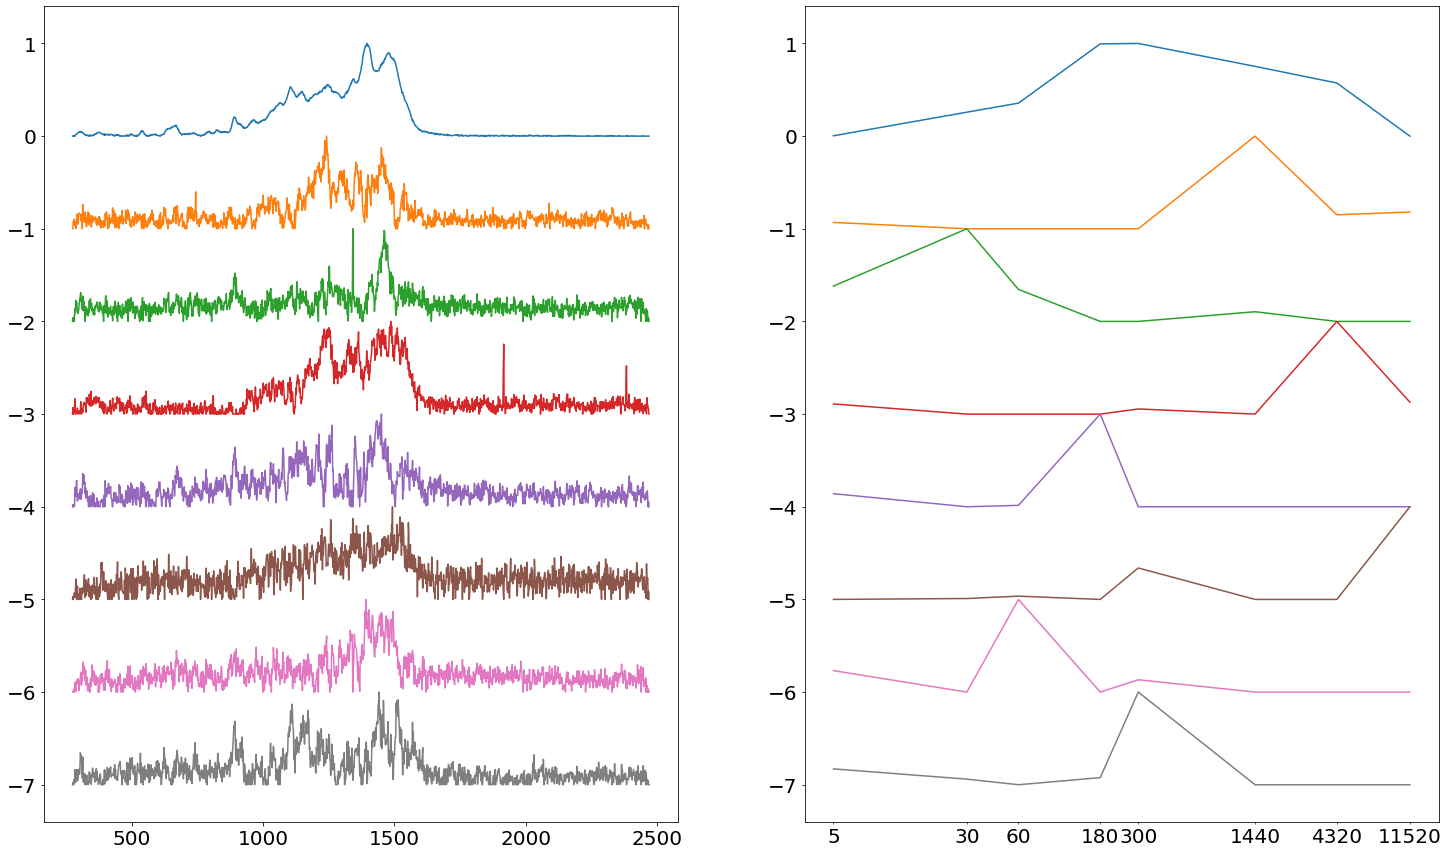

In [97]:
n_components= 8
peak_amplitude_time_log = [5, 30, 60, 180, 300, 1440, 4320, 11520]
model = NMF(n_components)
W = model.fit_transform(car_power_4_nmf)
H = model.components_
f_dataN = W
t_dataN = H
plt.figure("nmf up:time low:frequency ", figsize=(25, 15))
ax1 = plt.subplot(121)#, figsize = (15, 10))
for i in range(n_components):
    plt.plot(f_sup_0810[190:], (f_dataN[:,i]-min(f_dataN[:,i]))/np.mean(max(f_dataN[:,i])-min(f_dataN[:,i]))-i)#,colour[i])
# plt.show()
ax2 = plt.subplot(122)#, figsize=(15, 10))
for i in range(n_components):
    plt.plot(time_points, ((t_dataN[i]-min(t_dataN[i]))/(max(t_dataN[i])-min(t_dataN[i]))-i))#,colour[i])
ax2.set_xscale("log")
ax2.xaxis.set_minor_locator(ticker.FixedLocator(peak_amplitude_time_log))
ax2.xaxis.set_major_locator(ticker.NullLocator())
ax2.xaxis.set_minor_formatter(ticker.ScalarFormatter())
plt.savefig("car_power4_nmf.png", dpi=500)
# plt.show()

/home/anvarkunanbayev/anaconda3/envs/Raman/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/anvarkunanbayev/anaconda3/envs/Raman/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


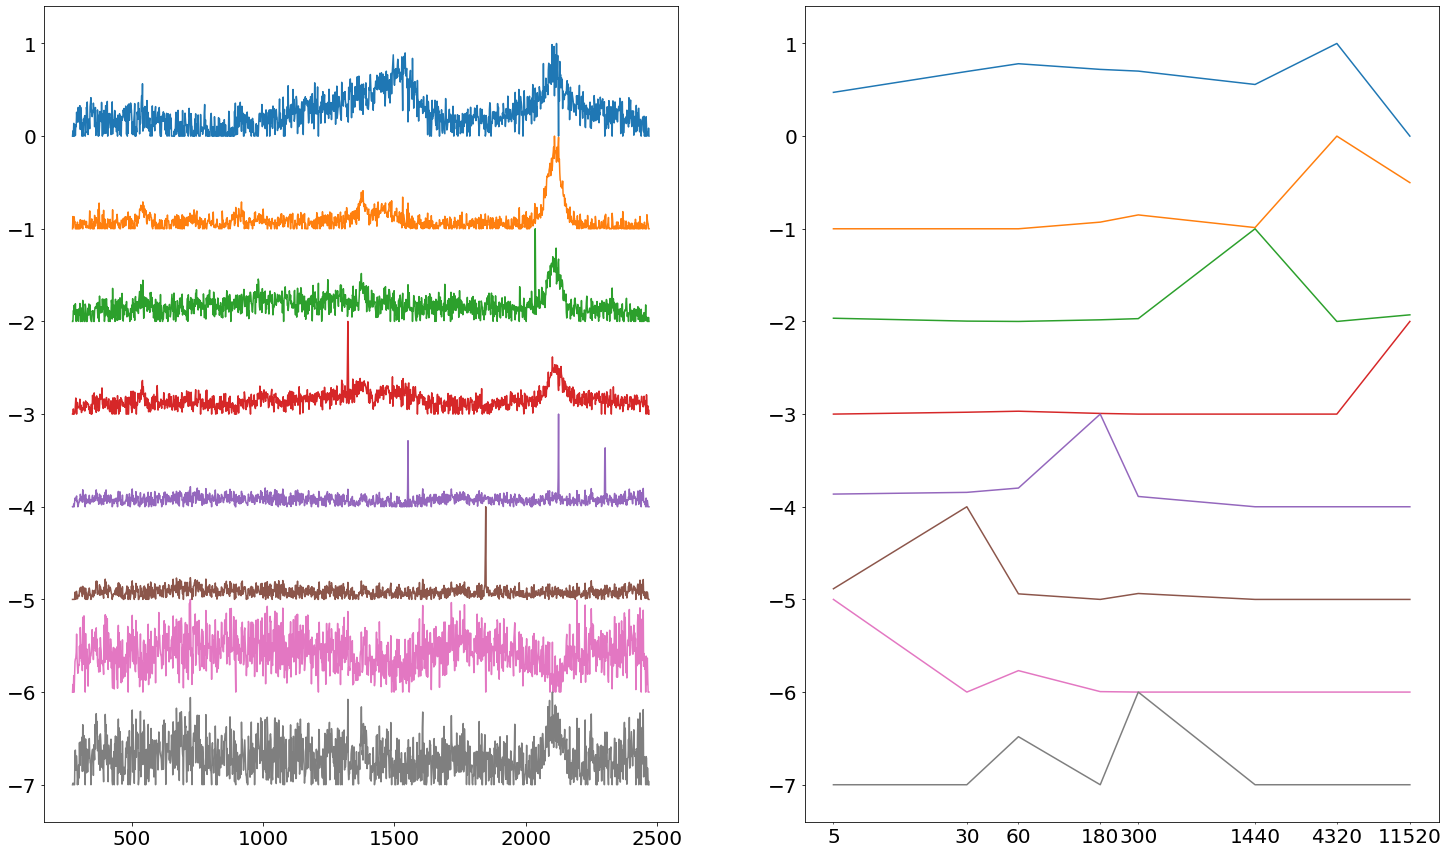

In [86]:
n_components= 8
peak_amplitude_time_log = [5, 30, 60, 180, 300, 1440, 4320, 11520]
model = NMF(n_components)
W = model.fit_transform(aceta_power_1_nmf)
H = model.components_
f_dataN = W
t_dataN = H
plt.figure("nmf up:time low:frequency ", figsize=(25, 15))
ax1 = plt.subplot(121)#, figsize = (15, 10))
for i in range(n_components):
    plt.plot(f_sup_0810[190:], (f_dataN[:,i]-min(f_dataN[:,i]))/np.mean(max(f_dataN[:,i])-min(f_dataN[:,i]))-i)#,colour[i])
# plt.show()
ax2 = plt.subplot(122)#, figsize=(15, 10))
for i in range(n_components):
    plt.plot(time_points, ((t_dataN[i]-min(t_dataN[i]))/(max(t_dataN[i])-min(t_dataN[i]))-i))#,colour[i])
ax2.set_xscale("log")
ax2.xaxis.set_minor_locator(ticker.FixedLocator(peak_amplitude_time_log))
ax2.xaxis.set_major_locator(ticker.NullLocator())
ax2.xaxis.set_minor_formatter(ticker.ScalarFormatter())
plt.savefig("aceta_power1_nmf.png", dpi=500)

/home/anvarkunanbayev/anaconda3/envs/Raman/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/anvarkunanbayev/anaconda3/envs/Raman/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


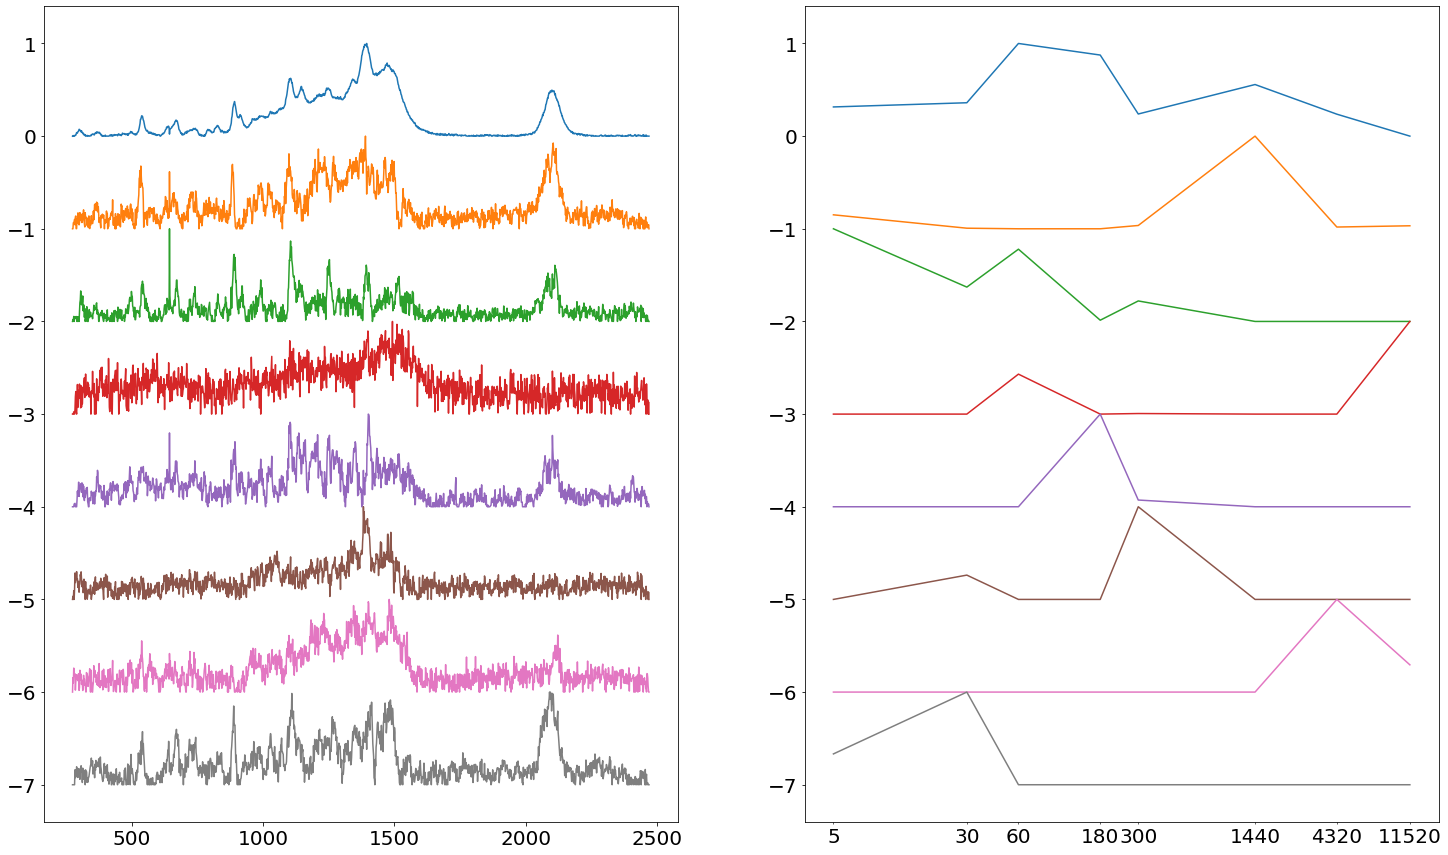

In [87]:
n_components= 8
peak_amplitude_time_log = [5, 30, 60, 180, 300, 1440, 4320, 11520]
model = NMF(n_components)
W = model.fit_transform(car_aceta_aceph_power_1_nmf)
H = model.components_
f_dataN = W
t_dataN = H
plt.figure("nmf up:time low:frequency ", figsize=(25, 15))
ax1 = plt.subplot(121)#, figsize = (15, 10))
for i in range(n_components):
    plt.plot(f_sup_0810[190:], (f_dataN[:,i]-min(f_dataN[:,i]))/np.mean(max(f_dataN[:,i])-min(f_dataN[:,i]))-i)#,colour[i])
# plt.show()
ax2 = plt.subplot(122)#, figsize=(15, 10))
for i in range(n_components):
    plt.plot(time_points, ((t_dataN[i]-min(t_dataN[i]))/(max(t_dataN[i])-min(t_dataN[i]))-i))#,colour[i])
ax2.set_xscale("log")
ax2.xaxis.set_minor_locator(ticker.FixedLocator(peak_amplitude_time_log))
ax2.xaxis.set_major_locator(ticker.NullLocator())
ax2.xaxis.set_minor_formatter(ticker.ScalarFormatter())
plt.savefig("car_aceta_aceph_power1_nmf.png", dpi=500)